## **Procesamiento del Lenguaje Natural**

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/

El objetivo es que se familiaricen con algunas herramientas típicas del Procesamiento del Lenguaje Natural (NLP por sus siglas en inglés).

La biblioteca fundamental que vamos a usar es NLTK. Probablemente tengan que instalarla.
- - -

## 1. Carga de datos

Lo primero que tienen que hacer es fijarse en qué formato están los datos. ¿De qué se trata es formato?¿Cómo se abre? Si googlean, van a ver que hay muchas formas de abrir archivos JSON con Python. Como venimos trabajando con Pandas, googleen "Open JSON with Pandas". Prueben esa función. Si les tira un error en el primer intento, googleen el error. Les aseguramos que la respuesta está muy a mano y es muy accesible, no tienen que hacer nada raro.

In [1]:
import itertools

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lopez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lopez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_json('../DataSets/Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


¿Qué forma tiene el dataset?¿Cuántas instancias?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?¿Podemos hablar ya de *features*?

In [4]:
dataset.shape

(26709, 3)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


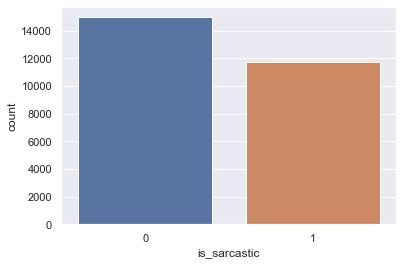

In [5]:
sns.countplot(dataset.is_sarcastic)
plt.show()

## 2. Breve exploración del dataset

Elegir una instancia del dataset al azar y seleccionar el *headline*.

In [6]:
index_random = np.random.randint(0,high = dataset.shape[0])
titular = dataset.iloc[index_random].headline
print(index_random, titular)

20149 dan quayle on standby to take over as bush family patriarch after george h.w. admitted to icu


¿Les parece que es sarcástico?¿Qué características del texto les hace creer - o no - eso? Comprobar si es sarcástico o no imprimiendo en la celda de abajo el valor correspondiente del dataset. (Como la mayoría de los titulares están en inglés y encima refieren a política local, no se preocupen si es una tarea difícil).

In [7]:
print(index_random, dataset.iloc[index_random].is_sarcastic)

20149 1


## 3. NLTK

Si es difícil para algunos humanos detectar el sarcasmo, probablemente también lo sea para una computadora. De todas formas, se puede hacer el intento. Para ello, es necesario extraer características de cada texto que nos sirvan para ir apuntando al objetivo. Elegir un titular que les llame la atención y probar las siguientes herramientas:

### Tokenización

¿Qué es y para qué sirve?¿Cuáles de todas las formas de tokenización presentadas les parece más útil para este problema?

1. `sent_tokenize`

In [8]:
type(titular)

str

In [9]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['dan quayle on standby to take over as bush family patriarch after george h.w.',
 'admitted to icu']

2. word_tokenize

In [10]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['dan',
 'quayle',
 'on',
 'standby',
 'to',
 'take',
 'over',
 'as',
 'bush',
 'family',
 'patriarch',
 'after',
 'george',
 'h.w',
 '.',
 'admitted',
 'to',
 'icu']

In [13]:
import re
titular_wt = nltk.tokenize.word_tokenize("El día de ayer fue el día más lluvioso del año!!.".lower())
re.sub("[^a-zA-Z!ñíá]"," ",str(titular_wt))

'  el    día    de    ayer    fue    el    día    más    lluvioso    del    año    !    !       '

### Normalización

¿Qué es y para qué sirve? Notar que varias formas de normalización ya vienen aplicadas en el dataset.

1. Stopwords

Importar los `stopwords` del inglés e imprimirlos.

In [19]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

¿Les parece conveniente aplicar todos los stopwords que aparecen en esa lista?

Eliminar del titular elegido los stopwords.

In [20]:
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['día', 'ayer', 'día', 'lluvioso', 'año', '!', '!', '.']

¿Cuál o cuáles palabras se fueron?

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, usar `nltk` para extrar la frecuencia con que aparece cada palabras. ¿Tiene sentido esto para titulares?

In [21]:
titular_wt_sin_sw

['día', 'ayer', 'día', 'lluvioso', 'año', '!', '!', '.']

In [22]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'día': 2, '!': 2, 'ayer': 1, 'lluvioso': 1, 'año': 1, '.': 1})

In [23]:
type(freq)

nltk.probability.FreqDist

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del dataset en su conjunto. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno. Recuerden usar máscaras.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.

#### No-Sarcasmo

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [25]:
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [26]:
todos_titulares_no_sarcasmo = []
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_no_sarcasmo.append(titular)

In [27]:
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo[0:10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

In [28]:
list(itertools.chain(*('hola mundo')))

['h', 'o', 'l', 'a', ' ', 'm', 'u', 'n', 'd', 'o']

In [29]:
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
freq_no_sarcasmo

FreqDist({'trump': 1446, 'donald': 458, 'says': 349, 'women': 317, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, 'people': 241, ...})

In [30]:
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [31]:
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head(30)

,Word,Frequency
46,trump,1446
229,donald,458
421,says,349
29,women,317
258,one,268
305,year,244
284,first,242
28,world,241
52,man,241
343,people,241


In [32]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,says,349
3,women,317
4,one,268


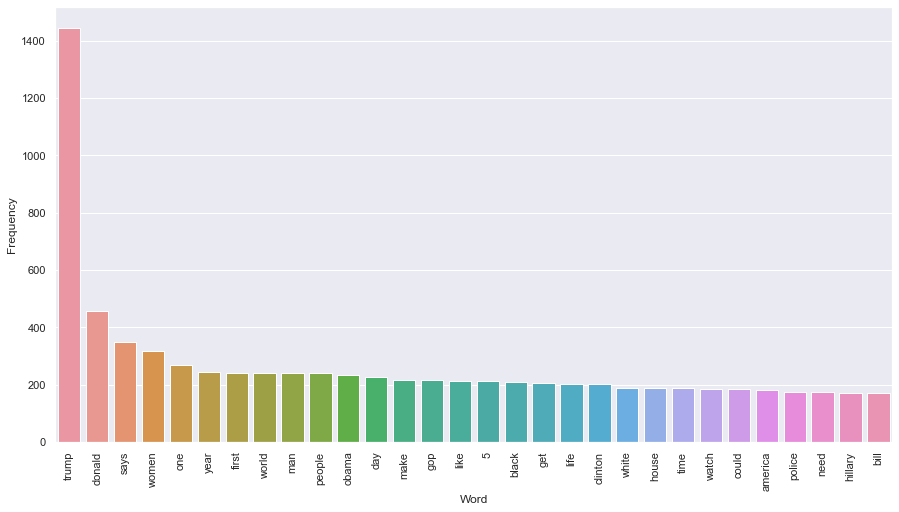

In [33]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Sarcasmo

In [34]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [35]:
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular)

In [36]:
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))

In [37]:
todos_titulares_sarcasmo[0:10]

['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner']

In [38]:
list(itertools.chain(*('HOLA MUNDO!!!')))

['H', 'O', 'L', 'A', ' ', 'M', 'U', 'N', 'D', 'O', '!', '!', '!']

In [39]:
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
freq_sarcasmo

FreqDist({'man': 1154, 'area': 480, 'report': 426, 'nation': 339, 'woman': 319, 'year': 308, 'one': 273, 'old': 267, 'time': 252, 'day': 245, ...})

In [40]:
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

,Word,Frequency
0,mom,117
1,starting,32
2,fear,16
3,son,71
4,web,7


In [41]:
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_sarcasmo.head()

,Word,Frequency
30,man,1154
182,area,480
157,report,426
56,nation,339
183,woman,319


In [42]:
df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,man,1154
1,area,480
2,report,426
3,nation,339
4,woman,319


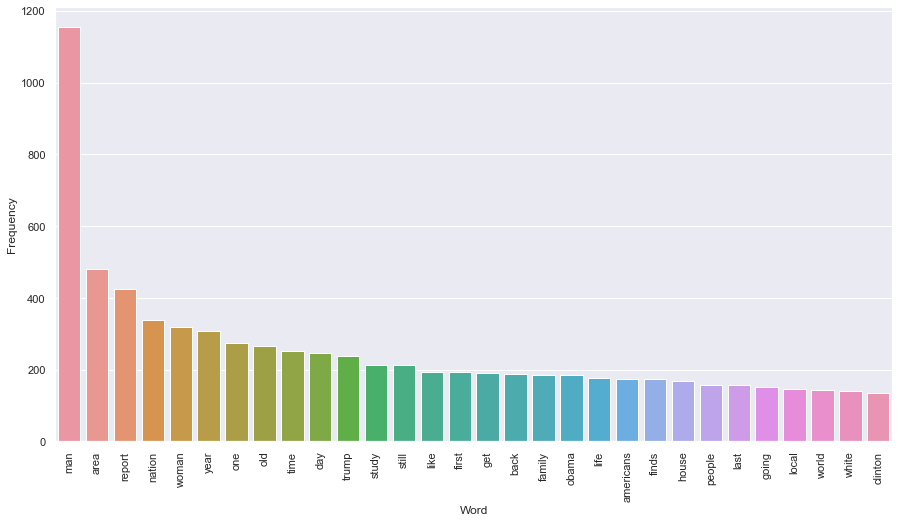

In [43]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## 4. Stemming
Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a la como estan conjugadas, la computadora las tratará como palabras distintas, pero en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.

a. Importar nuevamente el dataset completo

In [44]:
dataset = pd.read_json('../DataSets/Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


b, Tomar del `dataset` solo las columnas de interes

In [45]:
dataset=pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


c. Antes de realizar el proceso de Stemming, vamos a normalizar el texto con lo que ya estuvimos viendo. Le agregamos en este caso el uso de la libreria `re`, que nos permite sacar del texto todos los caracteres que no sean palabras. Notemos que hay veces que no conviene quitar estos caracteres ya que, por ejemplo, no podremos distiguir preguntas (?) o exclamaciones (!).

In [46]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [50]:
stemmer.stem('man')

'man'

In [51]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    #dataset["titular_normalizado"] = titular_list


d. Agregamos al dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [52]:
dataset["titular_stem"] = titular_list
dataset.tail(50)

,headline,is_sarcastic,titular_stem
26659,obamacare case to be turned against government...,0,obamacar case turn govern emiss rule
26660,the tragic death of alejandro nieto and san fr...,0,tragic death alejandro nieto francisco gentrif
26661,olympic skier ashley caldwell's snooze button ...,0,olymp skier ashley caldwel snooz button habit ...
26662,frantic john kerry looks on as teresa slowly l...,1,frantic john kerri look teresa slowli lower jo...
26663,hot-rod-lincoln-driving son may have contribut...,1,lincoln drive contribut father alcohol
26664,"yes, men are still harassing people on the str...",0,still harass peopl street still okay
26665,floyd mayweather jr. stripped of title from ma...,0,floyd mayweath strip titl manni pacquiao fight
26666,man on horse hates city,1,hors hate citi
26667,the iconic blue ikea bag is getting a makeover,0,icon blue ikea get makeov
26668,poll: majority of americans ready to give up o...,1,poll major american readi give someon els goe ...


Armamos un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [53]:
dataset_stem=pd.concat([dataset.titular_stem,dataset.is_sarcastic],axis=1)
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios

In [54]:
dataset_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titular_stem  26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 626.0+ KB


## 5. Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet` que se encuentra en la solapa 'corpora' y las librerias 'maxent_treebank_pos_' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [55]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [56]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Veamos cómo actúa el lemmatizer sobre una frase de ejemplo.

In [57]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todo lo que no sean letras
frase = re.sub("[^a-zA-Z]"," ",str(frase))
# Pasamos a minúsculas
frase = frase.lower()
# Tokenizamos
frase_tokens = nltk.word_tokenize(frase)

# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra,wordnet_lemmatizer.lemmatize(palabra)))

Word                Lemma               
he                  he                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
he                  he                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
sun                 sun                 


¿Les sorprende lo que paso? No cambiaron casi nada (solo se fueron las "s" del final). El problema es que precisamos darle información extra al Lemmatizer, decirle qué rol está cumpliendo la palabra en la oración. Si se fijan en la documentación, esto se hace pasandole un argumento extra a la función llamado POS (Part Of Speech).

Hay distintos metodos que intentan averiguar el rol que cumple una palabra en una oración. Nosotros vamos a utilizar uno que viene incorporado en NLTK llamado pos_tag.

In [58]:
print(nltk.pos_tag(frase_tokens))

[('he', 'PRP'), ('was', 'VBD'), ('running', 'VBG'), ('and', 'CC'), ('eating', 'VBG'), ('at', 'IN'), ('same', 'JJ'), ('time', 'NN'), ('he', 'PRP'), ('has', 'VBZ'), ('bad', 'JJ'), ('habit', 'NN'), ('of', 'IN'), ('swimming', 'NN'), ('after', 'IN'), ('playing', 'VBG'), ('long', 'JJ'), ('hours', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('sun', 'NN')]


Las etiquetas refieren al tipo de palabra. Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende 'wordnet_lemmatizer'.

In [59]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Veamos finalmente como funciona en nuestro ejemplo.

In [60]:
frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(frase)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(frase)]

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))

Palabra:            Tipo:               Lemma:              
he                  n                   he                  
was                 v                   be                  
running             v                   run                 
and                 n                   and                 
eating              v                   eat                 
at                  n                   at                  
same                a                   same                
time                n                   time                
he                  n                   he                  
has                 v                   have                
bad                 a                   bad                 
habit               n                   habit               
of                  n                   of                  
swimming            v                   swim                
after               n                   after               
playing             v   

In [61]:
wordnet_lemmatizer.lemmatize('men', get_wordnet_pos('men'))

'men'

matriz_titulosa. Ahora les toca aplicar todo esto a nuestro dataset. Vamos a volver a importarlo y hacer un procedimiento análogo al que hicimos para la parte de Stemming.

In [62]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = pd.read_json('../DataSets/Sarcasm_Headlines_Dataset.json', lines= True)
dataset = pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [63]:
# Este proceso demora bastante!
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)

    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [64]:
dataset["titular_lemm"] = titular_list
dataset.tail(30)

,headline,is_sarcastic,titular_lemm
26679,"un/opcw report blames syria government, islami...",0,opcw report blame syria government islamic sta...
26680,kim jong-un's absence leaves north korean gove...,1,jong absence leaf north korean government offi...
26681,dog born with odds stacked against her found j...,0,born odds stack found parent need
26682,"american dream week a smashing, mostly uninves...",0,american dream week smash mostly uninvestigate...
26683,complete idiot forgot to shave area between mo...,1,complete idiot forgot shave area mouth nose
26684,retreating clinton campaign torches iowa town ...,1,retreat clinton campaign torch iowa town slow ...
26685,don't nobody wanna hear area man run his mouth,1,nobody hear area mouth
26686,48 syrian civilians massacred during claire da...,1,syrian civilian massacre claire dane emmy awar...
26687,readin' researchin' writin' and the tools to m...,0,readin researchin writin tool make happen
26688,report: uttering phrase 'easy does it' prevent...,1,report utter phrase easy prevents drywall dama...


b. Por último nos armamos un nuevo datasate llamado `dataset_lem` que tenga solo las columnas `titular_lemm` y `is_sarcastic`.

In [65]:
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,former versace store clerk sue secret black co...,0
1,roseanne revival catch thorny political mood w...,0
2,start fear series closest thing grandchild,1
3,boehner want wife listen come alternative debt...,1
4,rowling wish snape happy birthday magical,0


## 6. Vectorizar
Tenemos un grupo de palabras por cada titular (bag of words). La idea ahora es representar esta lista de palabras como un vector. Para esto vamos a utilizar la función CountVectorizer de sklearn. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

a. Tomamos la lista de palabras y el vector que nos dice si es o no sarcástico el título

In [66]:
# Tomamos la lista de palabras y el vector que nos dice si es o no sarcastico el titulo
list_titulos = list(dataset_lemm['titular_lemm'].values)
is_sarc = dataset_lemm['is_sarcastic'].values

In [ ]:

## Para probar con Stemmizer:
list_titulos = list(dataset_stem['titular_stem'].values)
is_sarc = dataset_stem['is_sarcastic'].values

b. Preparamos el conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros. Les recomendamos fuertemente leer su documentación.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, stop_words="english" , ngram_range=(1,2))

Notemos que desde `CountVectorizer` se pueden quitar las stopwords (algo que ya hicimos con `nltk`) e incluir los n_gramas automáticamente.

c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.

In [68]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:200])

50 palabras mas usadas:  ['abortion', 'abuse', 'accidentally', 'accord', 'accuse', 'act', 'action', 'activist', 'actor', 'actually', 'add', 'address', 'administration', 'admits', 'adorable', 'advice', 'afghanistan', 'age', 'agent', 'ahead', 'airline', 'airport', 'album', 'allegation', 'allow', 'amaze', 'amazon', 'america', 'american', 'amid', 'animal', 'anniversary', 'announce', 'announces', 'answer', 'anti', 'apartment', 'apologizes', 'apparently', 'appear', 'apple', 'archive', 'area', 'area woman', 'arrest', 'artist', 'asian', 'ask', 'asks', 'assault', 'attack', 'attempt', 'audience', 'average', 'avoid', 'award', 'away', 'baby', 'bad', 'ball', 'band', 'bank', 'base', 'bathroom', 'battle', 'beach', 'bear', 'beat', 'beautiful', 'beauty', 'beer', 'begin', 'believe', 'benefit', 'bernie', 'bernie sander', 'best', 'biden', 'big', 'billion', 'bird', 'birth', 'birthday', 'black', 'blame', 'blast', 'block', 'blood', 'blue', 'board', 'body', 'book', 'border', 'bos', 'bowl', 'boy', 'boyfriend',

## 7. Modelar

Ahroa sí estamos listos para usar todo nuestro conocimiento de modelos en este set de datos. Tengamos en cuenta que, dependiendo el número de palabras (features) que hayamos elegido, los modelos pueden tardar un rato en entrenarse.

a. Primero, como siempre, separamos en test y train.

In [79]:
type(matriz_titulos)

scipy.sparse.csr.csr_matrix

In [70]:
x = matriz_titulos.toarray()
x.shape

(26709, 1000)

In [76]:
y = is_sarc

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Tambien definimos una función que nos permite plotear los resultados en una matriz de confusión.

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Empecemos por un simple Naive Bayes para tener un benchmark de referencia para el accuracy.

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6578060651441408


b. Veamos cómo queda graficada la matriz de confusión:

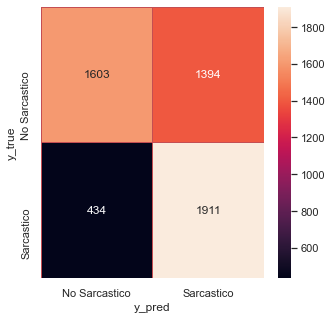

In [83]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.7023586671658555


b. Grafiquen su matriz de confusión:

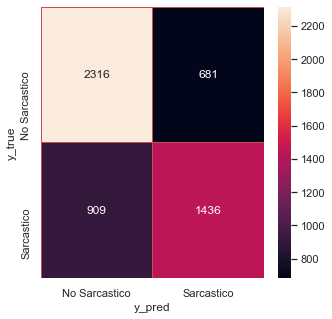

In [85]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

c. Algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


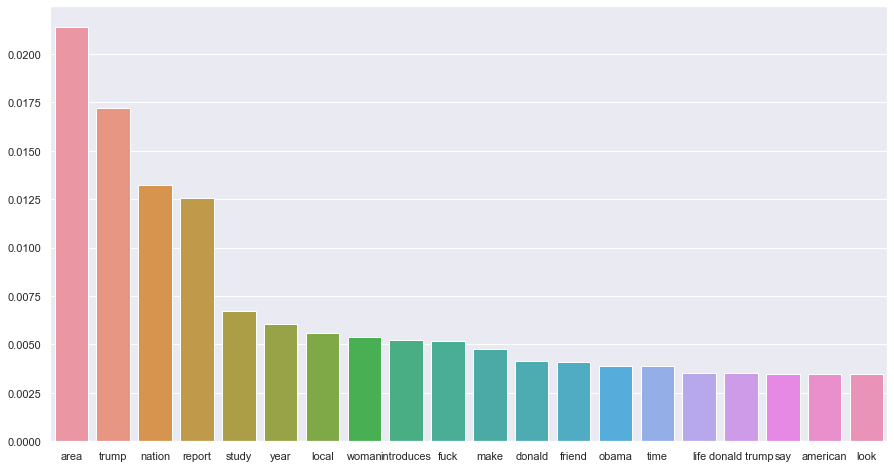

In [86]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [87]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.724073380756271

b. Grafiquen su matrz de confusión:

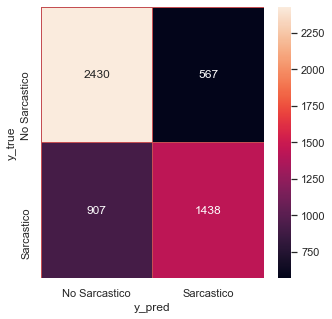

In [88]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

## 7. Explore las posibilidades

Si llegaron hasta acá, ya cuentan con todas las herramientas para poder explorar que sucede con el poder predictivo cuando van cambiando la manera en que procesan y vectorizan el texto. Algunas sugerencias para explorar son las siguientes:

a) Pruebe con Stemmizar en vez de lemmantizar

b) Cambie el numero de features que esta tomando.

c) Incluya los 2-gramas.

d) Conserve los signos de exclamación y pregunta del texto.

## TF-IDF

In [90]:
with open("../DataSets/EjemploPLN.txt", "r") as file:
    documents = file.read().splitlines()
    
print(documents)

['Los murciélagos usan la eco localización para navegar y encontrar comida en la oscuridad. ', 'Para eco localizar, los murciélagos emiten ondas sonoras por sus boca o nariz. ', 'Cuando las ondas sonoras impactan en un objeto, producen ecos. ', 'El eco rebota del objeto y vuelve a las orejas del murciélago.']


In [91]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

print(bag_of_words)

  (0, 15)	1
  (0, 17)	1
  (0, 31)	1
  (0, 11)	2
  (0, 4)	1
  (0, 13)	1
  (0, 24)	1
  (0, 19)	1
  (0, 9)	1
  (0, 1)	1
  (0, 8)	1
  (0, 23)	1
  (1, 15)	1
  (1, 17)	1
  (1, 4)	1
  (1, 24)	1
  (1, 14)	1
  (1, 7)	1
  (1, 21)	1
  (1, 28)	1
  (1, 25)	1
  (1, 29)	1
  (1, 0)	1
  (1, 18)	1
  (2, 8)	1
  (2, 21)	1
  (2, 28)	1
  (2, 2)	1
  (2, 12)	1
  (2, 10)	1
  (2, 30)	1
  (2, 20)	1
  (2, 26)	1
  (2, 5)	1
  (3, 4)	1
  (3, 12)	1
  (3, 20)	1
  (3, 6)	1
  (3, 27)	1
  (3, 3)	2
  (3, 32)	1
  (3, 22)	1
  (3, 16)	1


In [92]:
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(documents)
values

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<4x33 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [93]:
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names)

,boca,comida,cuando,del,eco,ecos,el,emiten,en,encontrar,...,oscuridad,para,por,producen,rebota,sonoras,sus,un,usan,vuelve
0,0.000000,0.27849,0.000000,0.000000,0.177757,0.000000,0.000000,0.000000,0.219565,0.27849,...,0.27849,0.219565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27849,0.000000
1,0.324181,0.00000,0.000000,0.000000,0.206920,0.000000,0.000000,0.324181,0.000000,0.00000,...,0.00000,0.255588,0.324181,0.000000,0.000000,0.255588,0.324181,0.000000,0.00000,0.000000
2,0.000000,0.00000,0.351192,0.000000,0.000000,0.351192,0.000000,0.000000,0.276883,0.00000,...,0.00000,0.000000,0.000000,0.351192,0.000000,0.276883,0.000000,0.351192,0.00000,0.000000
3,0.000000,0.00000,0.000000,0.612834,0.195582,0.000000,0.306417,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.306417,0.000000,0.000000,0.000000,0.00000,0.306417


## Ejercicio Extra 1

"Scrapear" una nota de algún medio digital y procesarla utilizando las herramientas que vimos. Para ver como importar el texto de la pagina de la noticia, ver video 1.6 'Frecuencia de palabras' de Procesamiento de Lenguaje Natural.

In [94]:
# Librerias que van a precisar para esto
# ejecutar: conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup
import urllib.request

response = urllib.request.urlopen('https://es.wikipedia.org/wiki/Prueba_de_Turing')

In [95]:
response

In [96]:
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()

In [97]:
text

'\n\n\n\nPrueba de Turing - Wikipedia, la enciclopedia libre\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\nPrueba de Turing\n\nDe Wikipedia, la enciclopedia libre\n\n\n\nIr a la navegación\nIr a la búsqueda\n Para otros usos de este término, véase Turing (desambiguación).\n La "interpretación estándar" de la prueba de Turing, en la cual la entidad C, el interrogador, le es dada la tarea de tratar de determinar qué entidad —¿A o B?— es una computadora y cual un ser humano. El interrogador se limita a la utilización de las respuestas a las preguntas escritas para tomar la determinación. Imagen adaptada de Saygin, 2000.[1]\u200b\nLa prueba de Turing o test de Turing es un examen de la capacidad de una máquina para exhibir un comportamiento inteligente similar al de un ser humano o indistinguible de éste. Alan Turing propuso que un humano evaluara conversaciones en lenguaje natural entre un humano y una máquina diseñada para generar respuestas si

## Ejercicio Extra 2

La búsqueda difusa consiste en encontrar grados de similaridad entre cadenas de caracteres, esto se utiliza cuando el dato que tenemos tiene bajo nivel de calidad. Hay diversos algoritmos, uno de ellos es la "Distancia de Levenshtein"

In [98]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Esta función calcula la distancia de Levenshtein entre dos cadenas de caracteres
        Si ratio_calc = True, la función computa la distancia de Levenshtein o similaridad entre dos cadenas de caracteres
        Para todas las 'i' y 'j', distance[i,j] contendrá la distancia de Levenshtein entre los primeros 'i' caracteres de 's'
        y el primer 'j' de 't'
        Fuente: https://www.datacamp.com/community/tutorials/fuzzy-string-python
    """
    import numpy as np
    # Initialize matrix of zeros
    s = str(s)
    t = str(t)
    rows = len(s)+1
    cols = len(t)+1
    if (rows == 1 | cols == 1):
        return 0
    col = 0
    row = 0
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "Las cadenas de caracteres están a {} ediciones de distancia".format(distance[row][col])

In [99]:
valor1 = 'Capital Federal'

In [100]:
valor2 = 'Cap. Federal'

In [101]:
levenshtein_ratio_and_distance(valor1, valor2, ratio_calc = True)

0.8148148148148148

In [102]:
levenshtein_ratio_and_distance(valor1, valor2)

'Las cadenas de caracteres están a 4 ediciones de distancia'